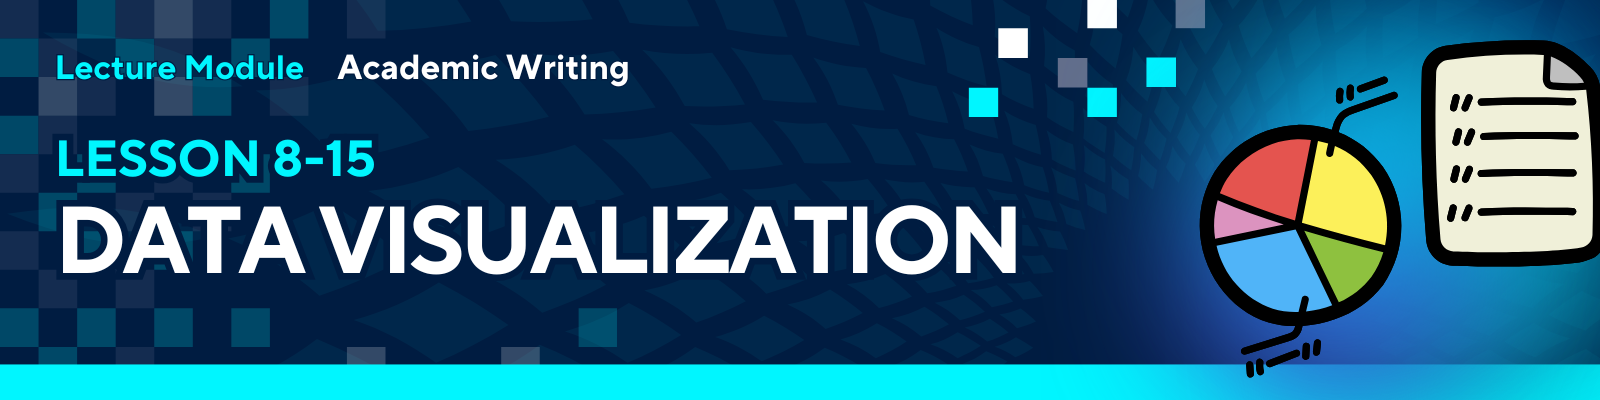

**Settings and Packages Preparation**<br>< <font color="red">**!**</font> > Run the following code whenever you open this workbook

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from urllib.request import urlretrieve
plt.rcParams['figure.dpi'] = 300

def load_dataset(url, filename): return pd.read_csv(filename, low_memory=False) if os.path.exists(filename) else pd.read_csv(url, low_memory=False).to_csv(filename, index=False) or pd.read_csv(filename, low_memory=False)

# If error, uncomment this:
#life_expectancy = load_dataset("https://www.dropbox.com/scl/fi/8vwam1u436lxn3d6qnf62/life_expectancy.csv?rlkey=aj5r2a8n44jo9swhcnuoo7fd5&st=r58zl09e&dl=0&raw=1", "life_expectancy.csv")
#city_temperature = load_dataset("https://www.dropbox.com/scl/fi/s4y96dto8d9vu20ao5du5/city_temperature.csv?rlkey=ppohfggy8i8v329y1dg9ub5p6&st=fuf9bpzy&dl=0&raw=1", "city_temperature.csv")

life_expectancy = load_dataset("https://www.dropbox.com/s/jr72bb2bpcxo725/life_expectancy.csv?raw=1", "../life_expectancy.csv")
city_temperature = load_dataset("https://www.dropbox.com/s/d56yws7bkn3eeam/city_temperature.csv?raw=1", "../city_temperature.csv")

UGLY, BAD, WRONG = "\033[33m╔\033[0m 😖 \033[33;1mUGLY!\033[0m \033[33m═══════════════════════════════\033[0m", "\033[35m╔\033[0m 👎 \033[35;1mBAD!\033[0m \033[35m═══════════════════════════════\033[0m", "\033[31m╔\033[0m ❌ \033[31;1mWRONG!\033[0m \033[31m═══════════════════════════════\033[0m"

In [ ]:
# Filter for year 2010 and create the Economy_status column
life_exp_adult_mort = life_expectancy[life_expectancy['Year'] == 2010].reset_index(drop=True).copy()
life_exp_adult_mort['Economy_status'] = life_exp_adult_mort['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

# Create Region mapping using pandas' str.contains
life_exp_adult_mort['Region'] = life_exp_adult_mort['Region'].apply(
    lambda x: 'Europe' if 'Europe' in str(x) else
             'Americas' if 'America' in str(x) else
             'Asia' if any(region in str(x) for region in ['Asia', 'Middle East']) else
             x
)

# Select the required columns
columns_to_keep = ['Country', 'Economy_status', 'Life_expectancy', 'Adult_mortality',
                   'Alcohol_consumption',  'Schooling',
                  'Under_five_deaths', 'Infant_deaths', 'GDP_per_capita', 'BMI', 'Population_mln','Region']
life_exp_adult_mort = life_exp_adult_mort[columns_to_keep]

# Display the dataframe
life_exp_adult_mort

,Country,Economy_status,Life_expectancy,Adult_mortality,Alcohol_consumption,Schooling,Under_five_deaths,Infant_deaths,GDP_per_capita,BMI,Population_mln,Region
0,Switzerland,Developed,82.2,56.9105,10.01,13.3,4.6,3.9,82027,25.1,7.82,Europe
1,Germany,Developed,80.0,77.6040,11.58,13.8,4.2,3.5,37761,26.3,81.78,Europe
2,Belize,Developing,72.1,181.5840,6.47,10.5,18.9,16.2,4768,28.4,0.32,Americas
3,Sweden,Developed,81.5,57.4920,7.38,12.3,3.1,2.5,48370,25.8,9.38,Europe
4,Brunei Darussalam,Developing,74.7,91.9455,0.25,8.8,9.7,7.9,33437,26.4,0.39,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Austria,Developed,80.6,74.5020,12.10,11.8,4.3,3.6,43335,25.4,8.36,Europe
175,"Congo, Dem. Rep.",Developing,56.9,282.5420,4.02,5.4,113.8,83.5,404,21.6,64.56,Africa
176,Guyana,Developing,68.1,216.6485,5.56,8.1,37.4,30.6,4847,25.8,0.75,Americas
177,Gabon,Developing,61.4,276.4095,8.36,7.6,61.7,41.6,6864,24.7,1.62,Africa




---



# **Lesson** <font color="#B0AD89"><strong>4A ⫶⫶ </strong></font>Visualizing Associations


<img src="https://i.imgur.com/msYG85A.png" width=1024 />

<img src="https://i.imgur.com/XXP9ESc.png" width=1024 />


## <font color="#B0AD89"><strong>4.1 ⫶ </strong></font>Simple x-y relationship

<img src="https://i.imgur.com/e8vE1e7.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Scatter plots

<img src="https://i.imgur.com/JUIVGiX.png" width=1024 />

<img src="https://i.imgur.com/V1MYFzn.png" width=1024 />



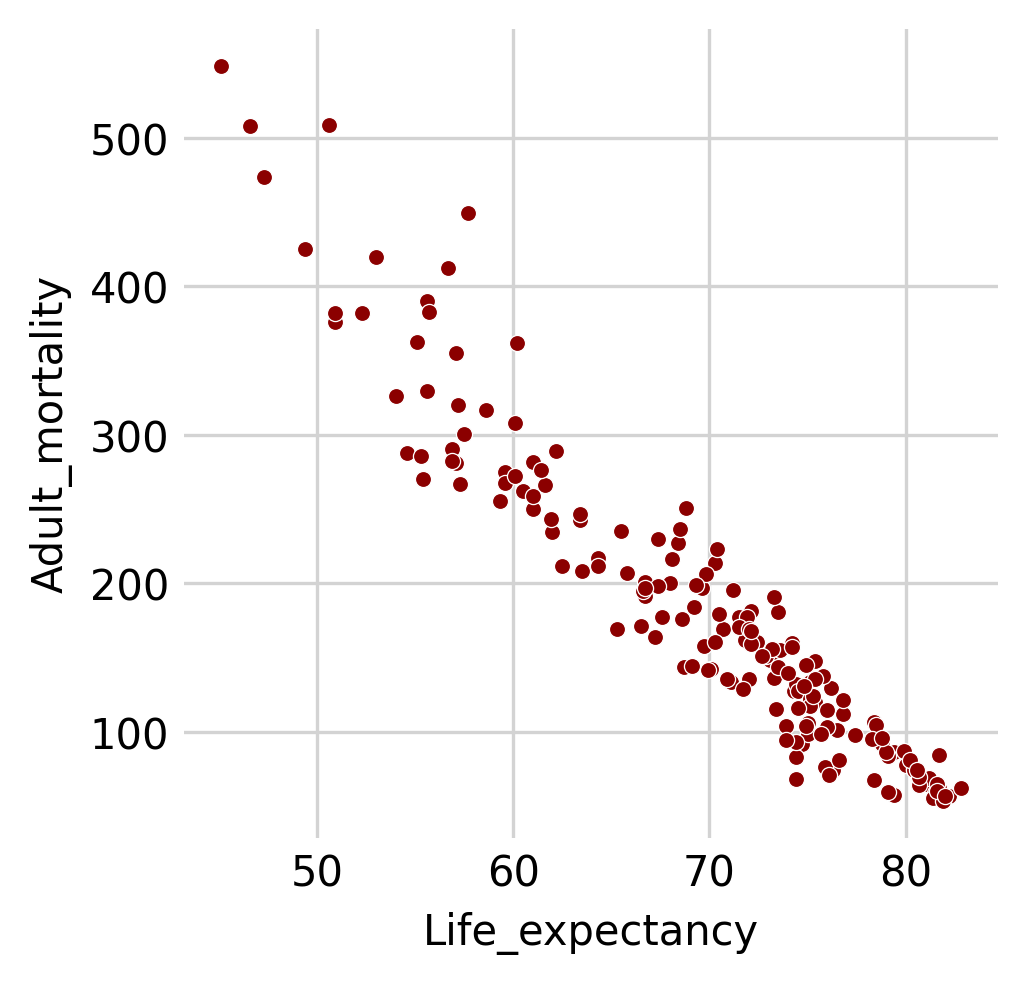

In [6]:
# Set figure size (half of 7x7)
plt.figure(figsize=(3.5, 3.5))

# Create scatter plot
sns.scatterplot(data=life_exp_adult_mort,
                x='Life_expectancy',
                y='Adult_mortality',
                s=15,
                facecolor='darkred',
                edgecolor='white',
                zorder=2)

# Add grid
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Display the plot
plt.show()

<img src="https://i.imgur.com/HYR6qNJ.png" width=1024 />



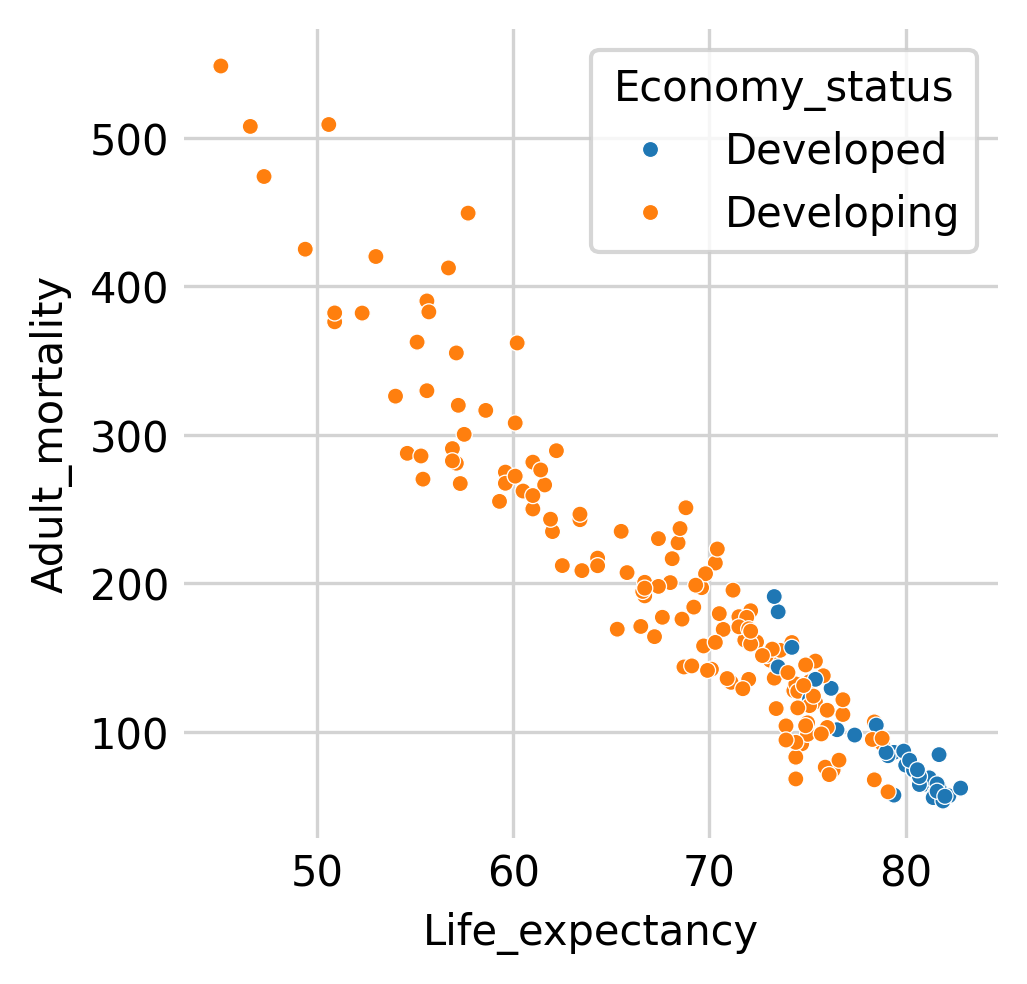

In [7]:
plt.figure(figsize=(3.5, 3.5))

sns.scatterplot(data=life_exp_adult_mort,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Economy_status',
               s=15,
               edgecolor='white',
               zorder=2)

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Position legend at (0.8, 0.8)
#plt.legend(bbox_to_anchor=(0.8, 0.8))

plt.show()

<img src="https://i.imgur.com/Fl33JHb.png" width=1024 />



<Figure size 1050x1050 with 0 Axes>

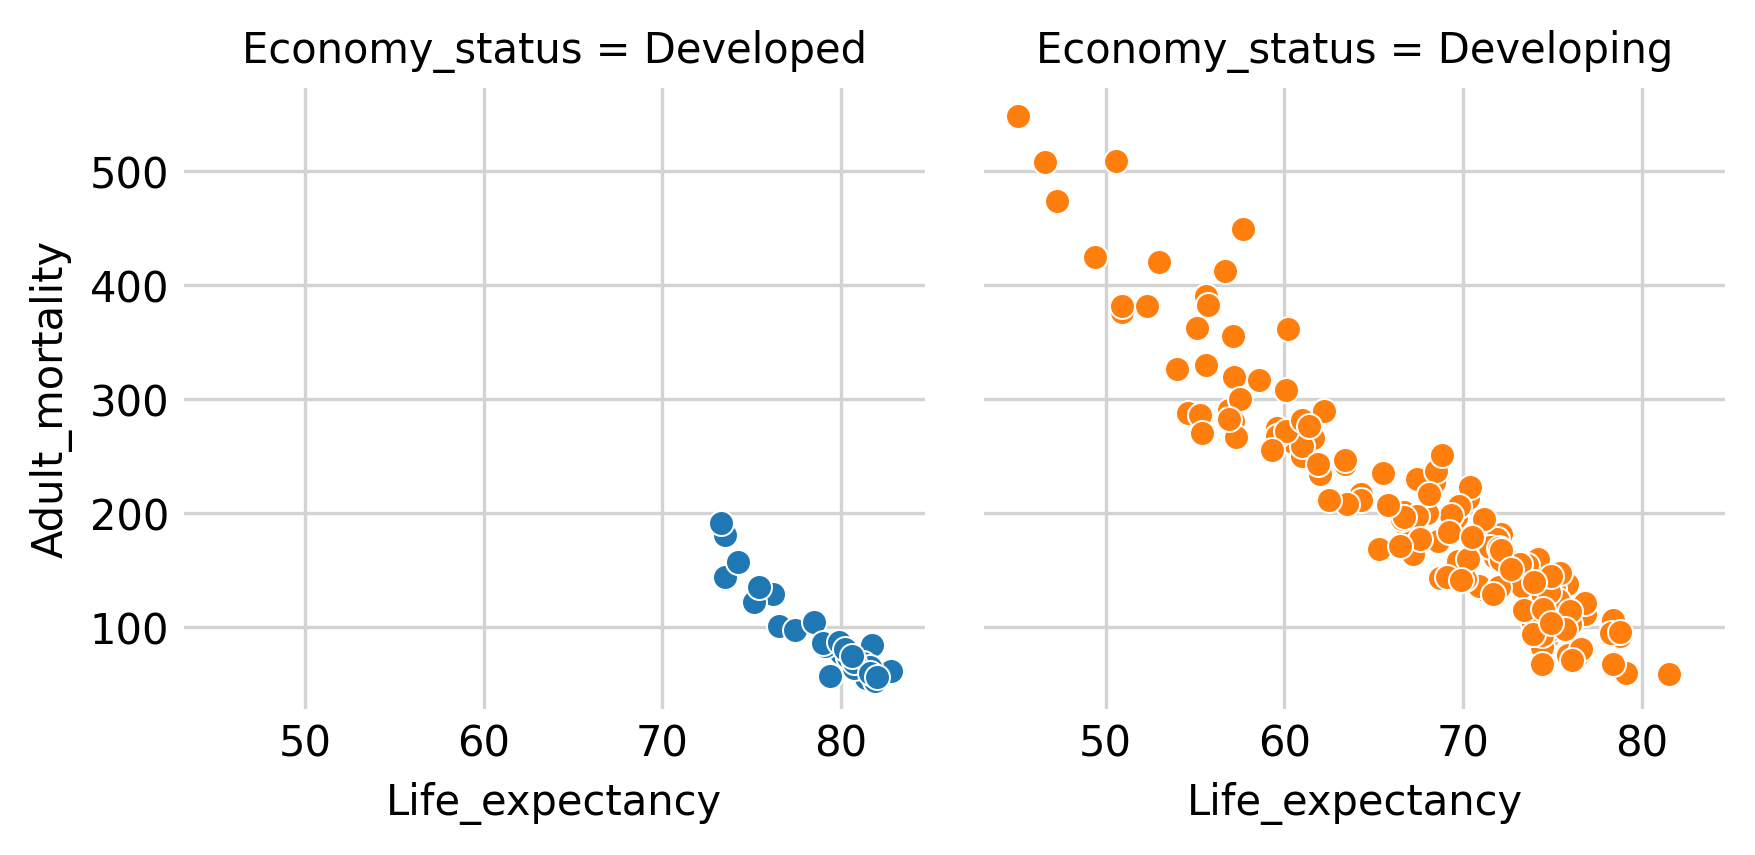

In [8]:
plt.figure(figsize=(3.5, 3.5))

g = sns.FacetGrid(life_exp_adult_mort,
                 col='Economy_status',
                 hue='Economy_status',
                 height=3, aspect=1)

g.map_dataframe(sns.scatterplot,
                x='Life_expectancy',
                y='Adult_mortality',
                edgecolor='white',
                zorder=2)

for ax in g.axes.flat:
   ax.grid(True, color='lightgrey', linestyle='-', zorder=1)
   ax.spines[['top','right','left','bottom']].set_visible(False)
   ax.tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/KM9XveE.png" width=1024 />

<img src="https://i.imgur.com/8rQZeD0.png" width=1024 />





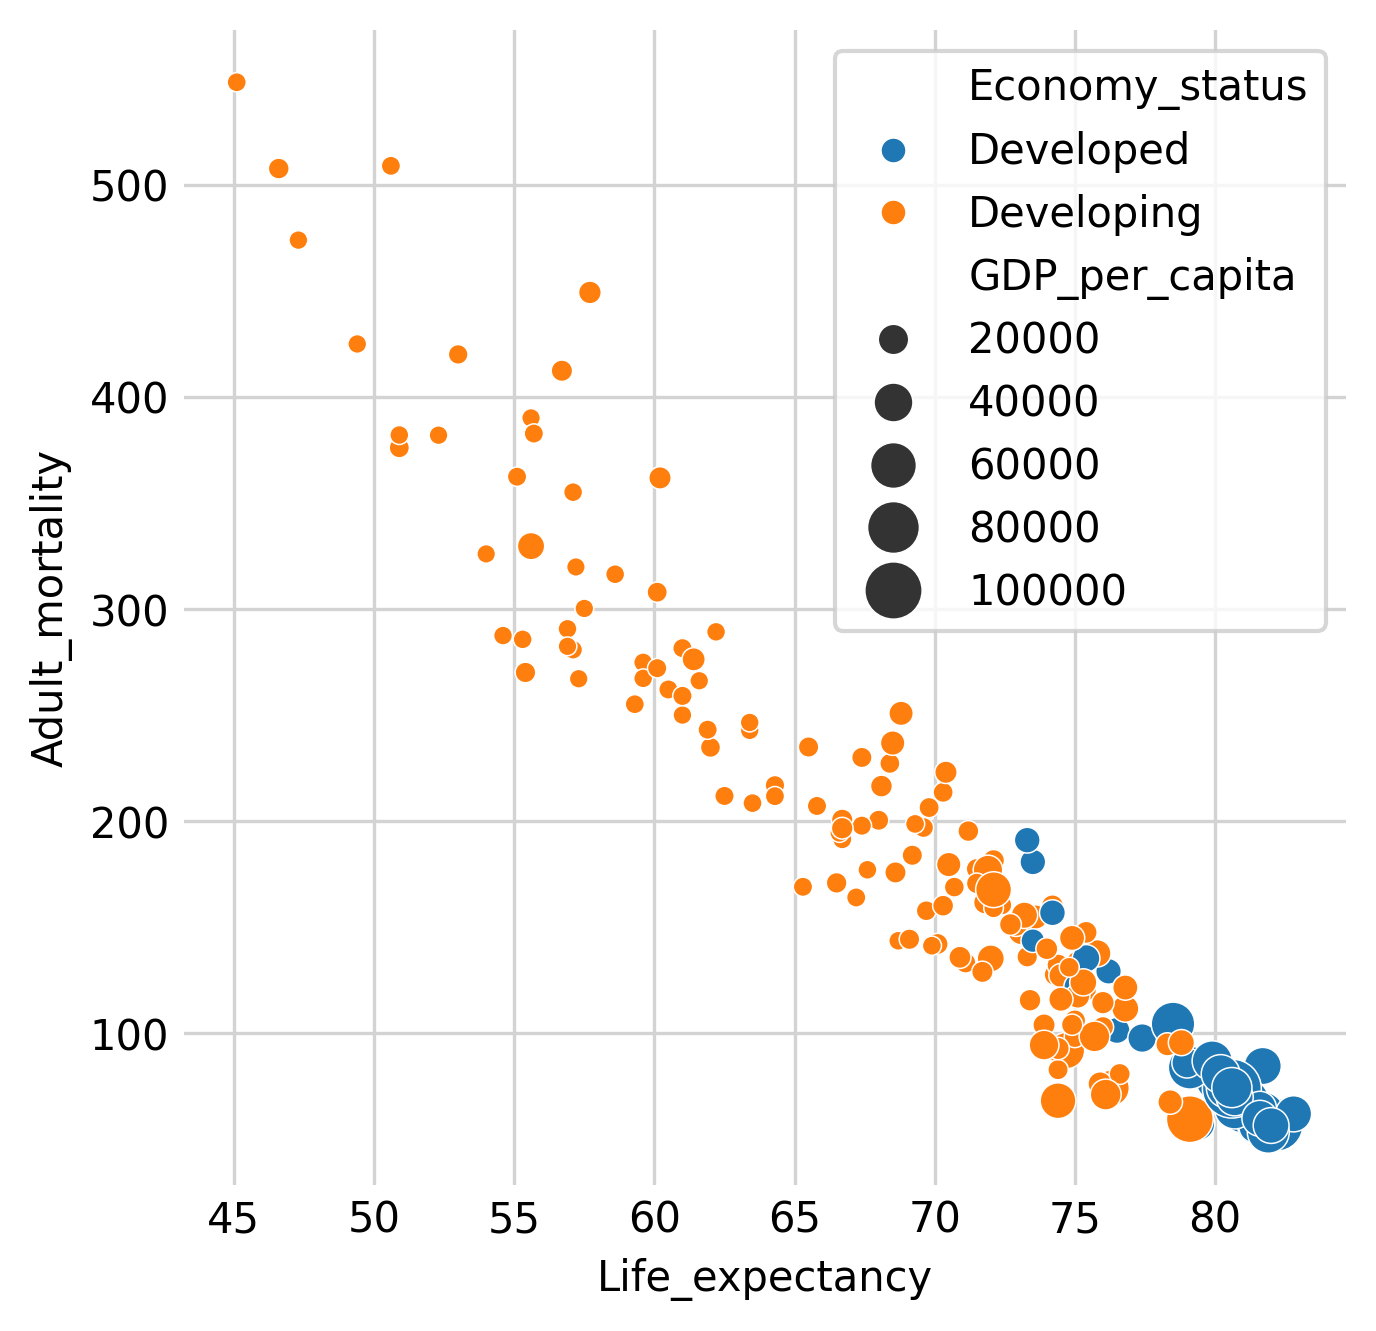

In [9]:
plt.figure(figsize=(5, 5))

sns.scatterplot(data=life_exp_adult_mort,
               x='Life_expectancy',
               y='Adult_mortality',
               hue='Economy_status',
               size='GDP_per_capita', sizes=(20,200),
               edgecolor='white',
               zorder=2)

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

# Position legend at (0.8, 0.8)
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Paired data
<img src="https://i.imgur.com/BkAymII.png" width=1024 />





In [10]:
# Filter and select relevant columns
slope_data = life_expectancy[
   (life_expectancy['Region'] == 'Middle East') &
   (life_expectancy['Year'].isin([2000, 2015]))
][['Country', 'Year', 'Life_expectancy']]


# Reshape data using pivot
scatter_data = slope_data.pivot(
   index='Country',
   columns='Year',
   values='Life_expectancy'
).reset_index()

scatter_data

Year,Country,2000,2015
0,Bahrain,74.4,76.8
1,"Iran, Islamic Rep.",70.2,75.8
2,Iraq,69.1,69.9
3,Israel,79.0,82.1
4,Jordan,71.7,74.1
5,Kuwait,73.1,75.1
6,Lebanon,74.5,78.8
7,Oman,72.1,76.9
8,Qatar,77.5,79.8
9,Saudi Arabia,72.6,74.7



<img src="https://i.imgur.com/2DSh6HX.png" width=1024 />

<img src="https://i.imgur.com/Lg9KFCY.png" width=1024 />


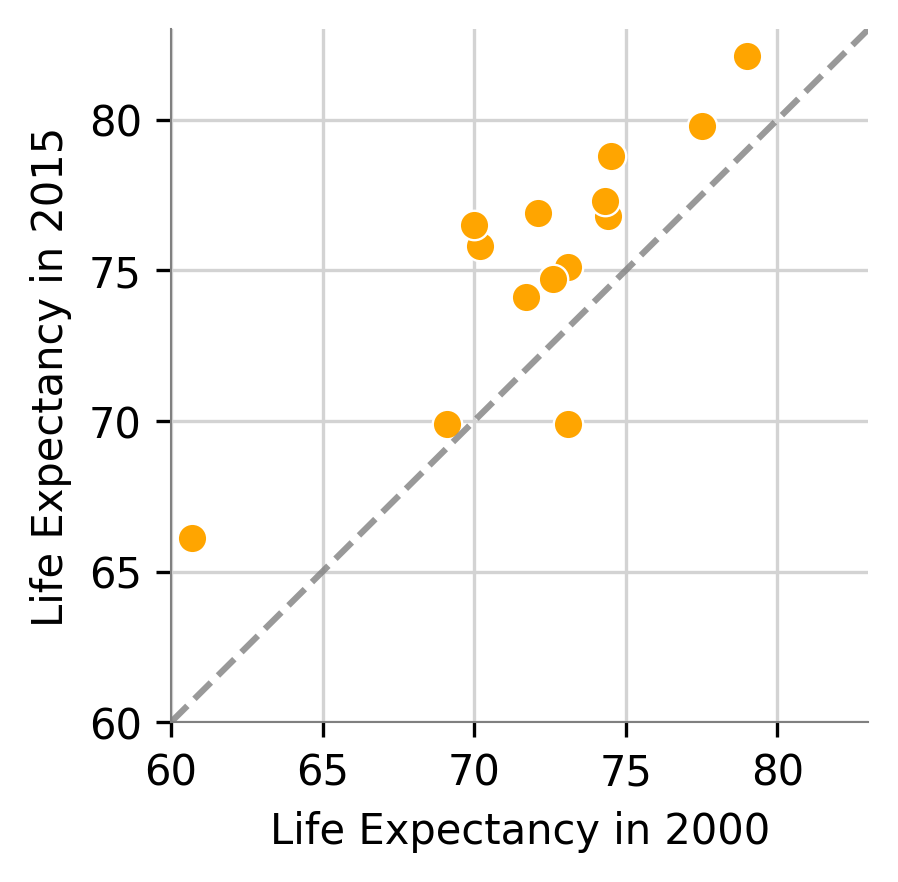

In [11]:
plt.figure(figsize=(3, 3))

sns.scatterplot(scatter_data,
            x=2000,
            y=2015,
            s=50,
            facecolor='orange',
            edgecolor='white',
            zorder=2)

# Add diagonal reference line
plt.plot([60, 83], [60, 83], '--', color='grey', alpha=0.8)

plt.xlim(60, 83)
plt.ylim(60, 83)

plt.xlabel('Life Expectancy in 2000')
plt.ylabel('Life Expectancy in 2015')

plt.grid(color='lightgrey', linestyle='-', zorder=1)
plt.gca().spines[['top','right']].set_visible(False)
plt.gca().spines[['left','bottom']].set_color('grey')
plt.gca().spines[['left','bottom']].set_linewidth(0.5)

plt.show()

<img src="https://i.imgur.com/mk2JmES.png" width=1024 />

<img src="https://i.imgur.com/SIitdcI.png" width=1024 />


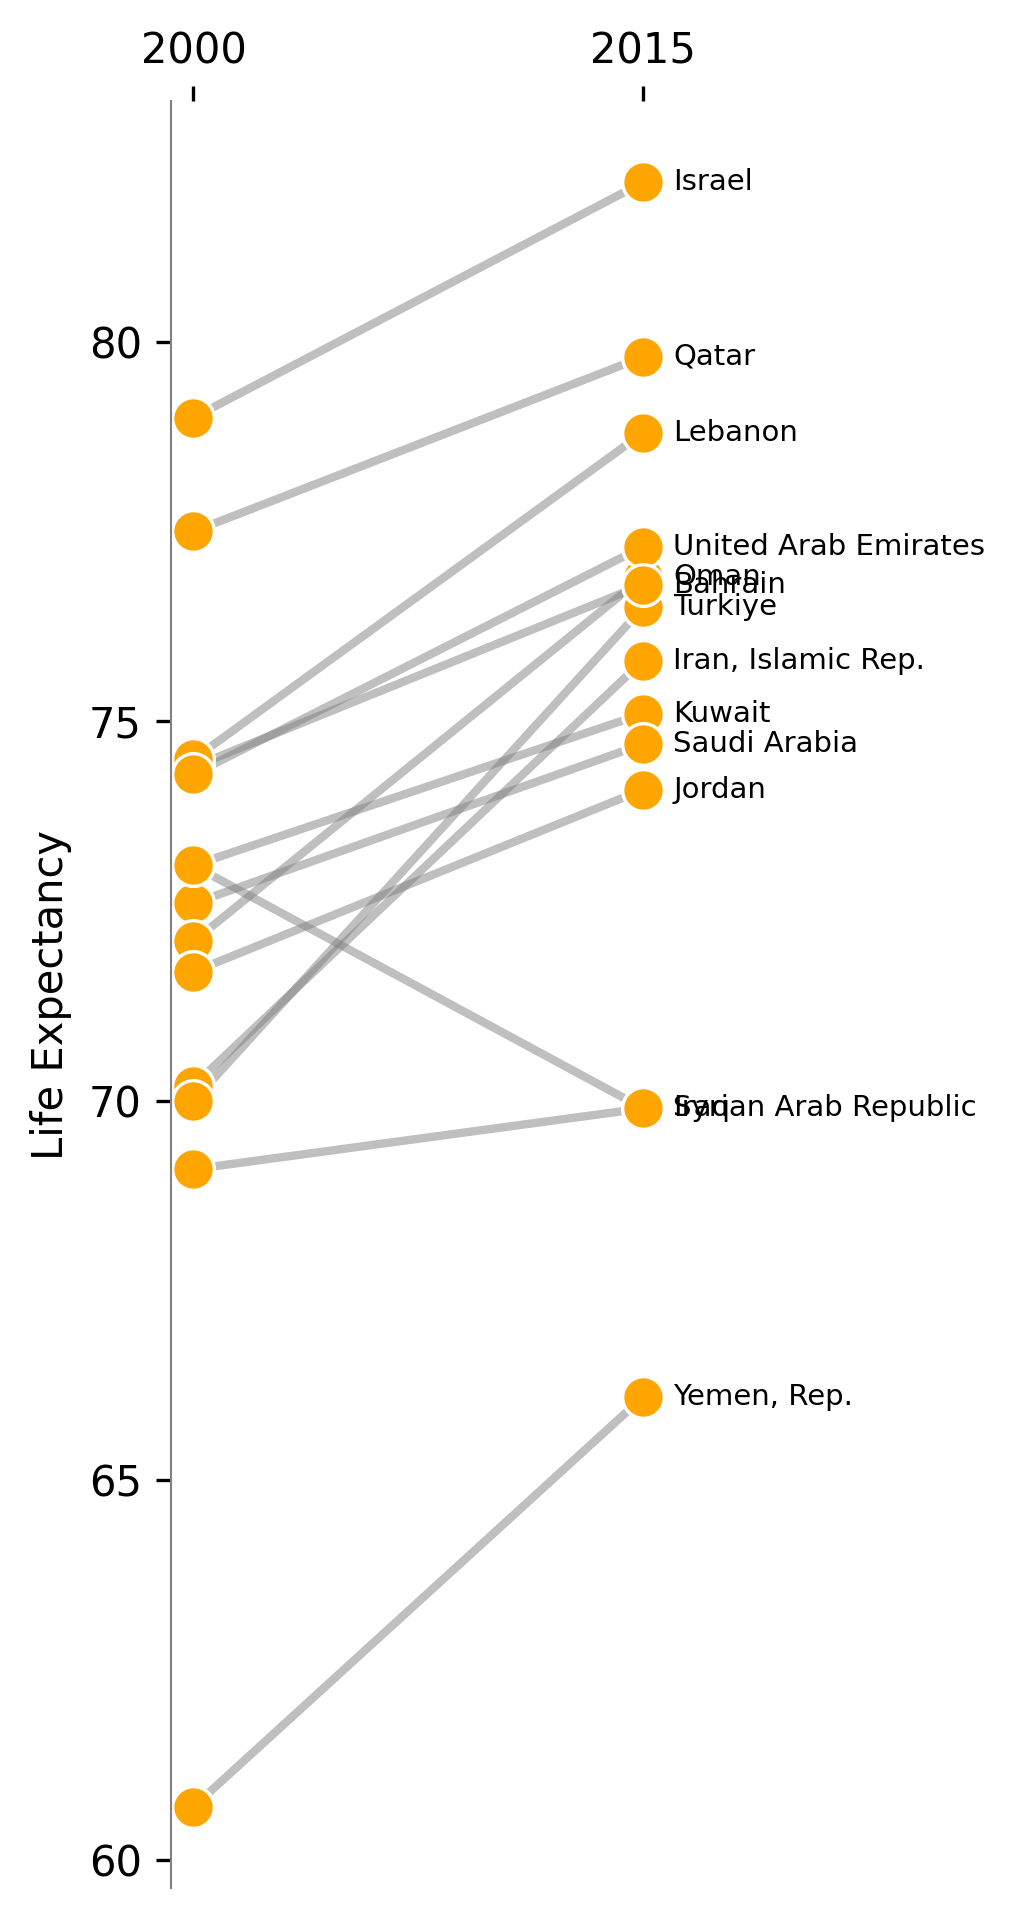

In [12]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(slope_data,
            x='Year',
            y='Life_expectancy',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.5,
            linewidth=2,
            zorder=1)

# Add scatter points
sns.scatterplot(slope_data,
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=100,
                edgecolor='white',
                zorder=2)

# Add labels for 2015
for _, row in slope_data[slope_data['Year'] == 2015].iterrows():
   plt.annotate(row['Country'],
               xy=(row['Year'], row['Life_expectancy']),
               xytext=(row['Year']+1, row['Life_expectancy']),
               va='center',size=7)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2015])
plt.xlabel('')
plt.ylabel('Life Expectancy')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

In [13]:
slope_data2 = life_expectancy[
   (life_expectancy['Region'] == 'Middle East') &
   (life_expectancy['Year'].isin([2000, 2008, 2015]))
][['Country', 'Year', 'Life_expectancy']]

slope_data2

,Country,Year,Life_expectancy
0,Turkiye,2015,76.5
74,Oman,2015,76.9
268,Israel,2015,82.1
323,"Iran, Islamic Rep.",2008,73.0
329,"Iran, Islamic Rep.",2000,70.2
330,Iraq,2015,69.9
408,Syrian Arab Republic,2008,73.6
550,Israel,2008,81.0
590,Kuwait,2015,75.1
638,Saudi Arabia,2015,74.7


<img src="https://i.imgur.com/fFe4gRi.png" width=1024 />


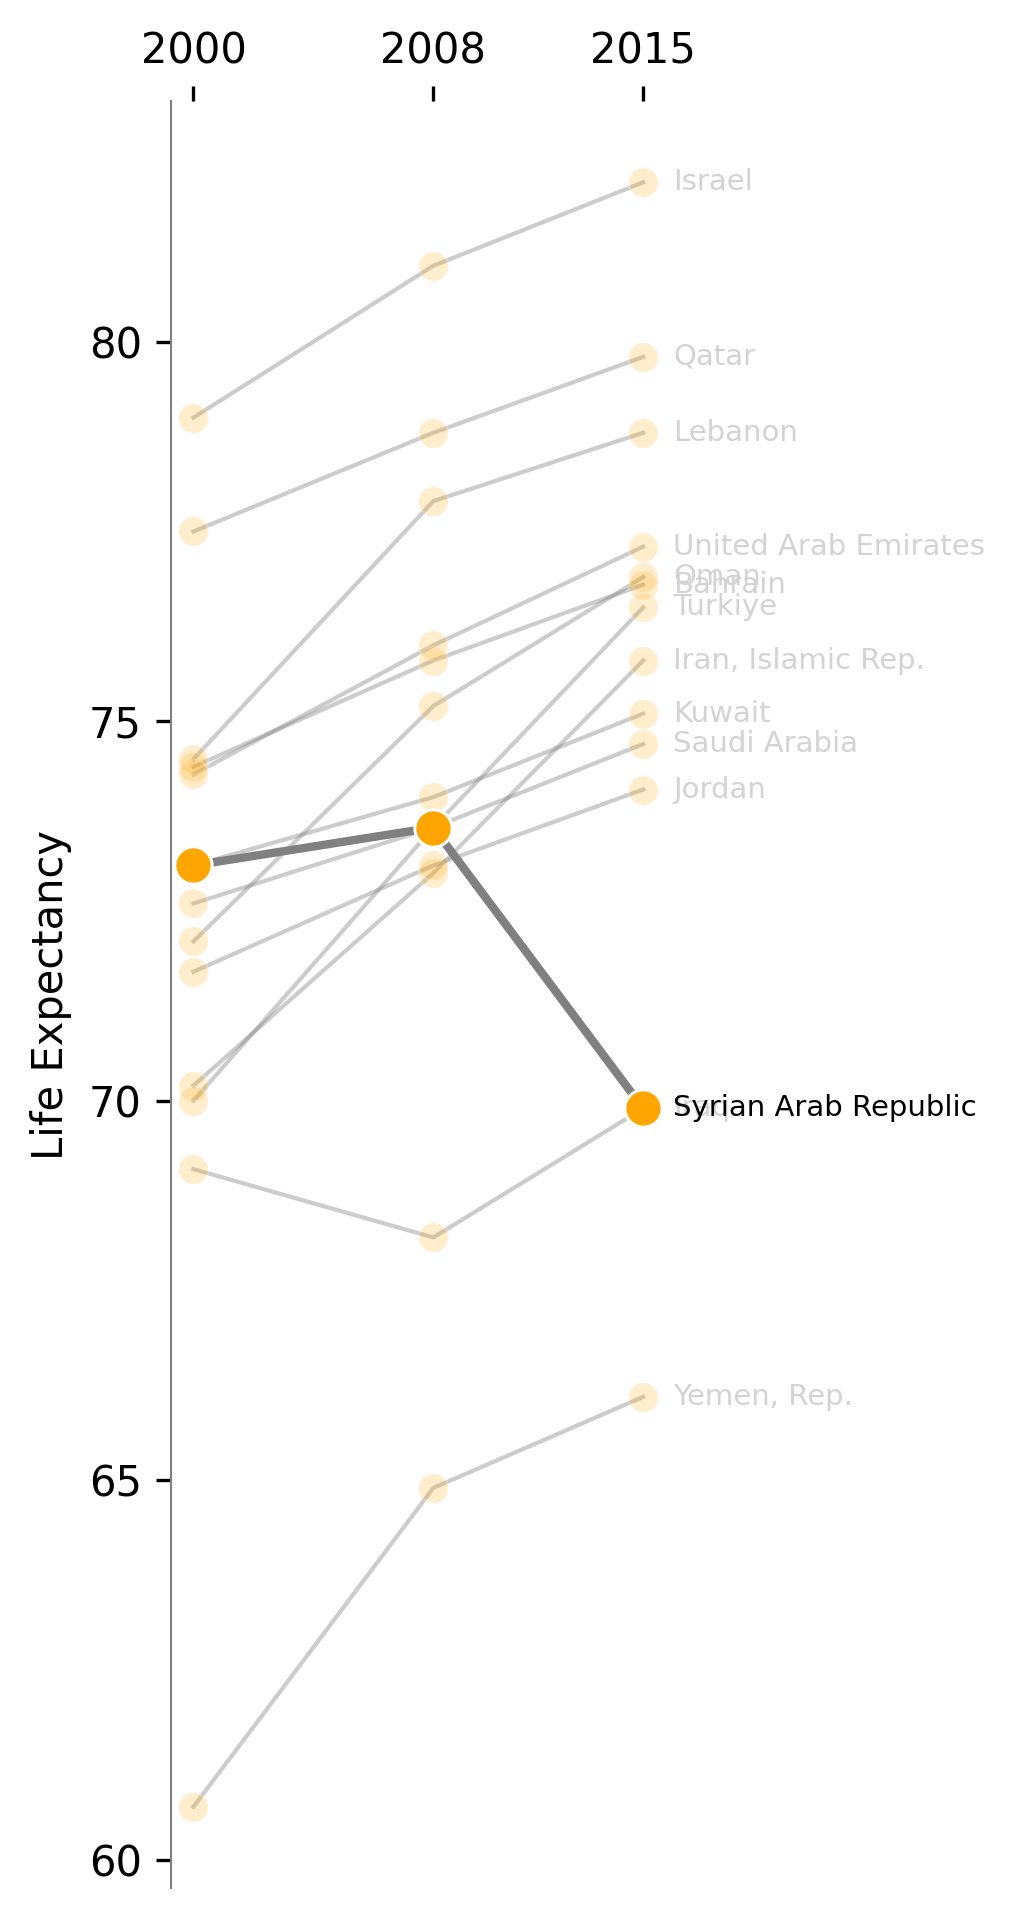

In [14]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(slope_data2,
            x='Year',
            y='Life_expectancy',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.4,
            linewidth=1,
            zorder=1)

# Add scatter points
sns.scatterplot(slope_data2,
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=50,
                edgecolor='white',
                alpha=0.2,
                zorder=2)

# Overlay Syria's data with alpha=1
sns.lineplot(slope_data2.query("Country == 'Syrian Arab Republic'"),
             x='Year',
            y='Life_expectancy',
            color='grey',
             alpha=1,
             linewidth=2,
             zorder=1)

sns.scatterplot(slope_data2.query("Country == 'Syrian Arab Republic'"),
                x='Year',
                y='Life_expectancy',
                color='orange',
                s=80,
                edgecolor='white',
                alpha=1,
                zorder=2)

## Add labels for 2015
# Add labels with conditional color
for _, row in slope_data2[slope_data2['Year'] == 2015].iterrows():
   color = 'black' if row['Country'] == 'Syrian Arab Republic' else 'lightgrey'
   plt.annotate(row['Country'],
               xy=(row['Year'], row['Life_expectancy']),
               xytext=(row['Year']+1, row['Life_expectancy']),
               va='center', size=7, color=color)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2008, 2015])
plt.xlabel('')
plt.ylabel('Life Expectancy')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice 4.1 ᆢ</strong></font>ᆢᆢ
**Issue: Does European Union countries are getting better GDP per capita in 2010 compared to the year 2000 and 2005?**

From the following dataset, make a pair plot for GDP per capita of European Union countries. Compare the year 2000, 2005, and 2010.


In [15]:
europe_GDP = life_expectancy.query(
   "Year in [2000, 2005, 2010] and Region == 'European Union' and Country != 'Luxembourg'"
)[['Country', 'Year', 'GDP_per_capita']]

europe_GDP

,Country,Year,GDP_per_capita
7,Hungary,2000,8971
35,Germany,2010,37761
46,Sweden,2010,48370
66,Lithuania,2005,9766
111,Italy,2005,33258
...,...,...,...
2652,Italy,2010,32058
2657,Greece,2000,18643
2724,Poland,2005,8569
2806,Austria,2010,43335


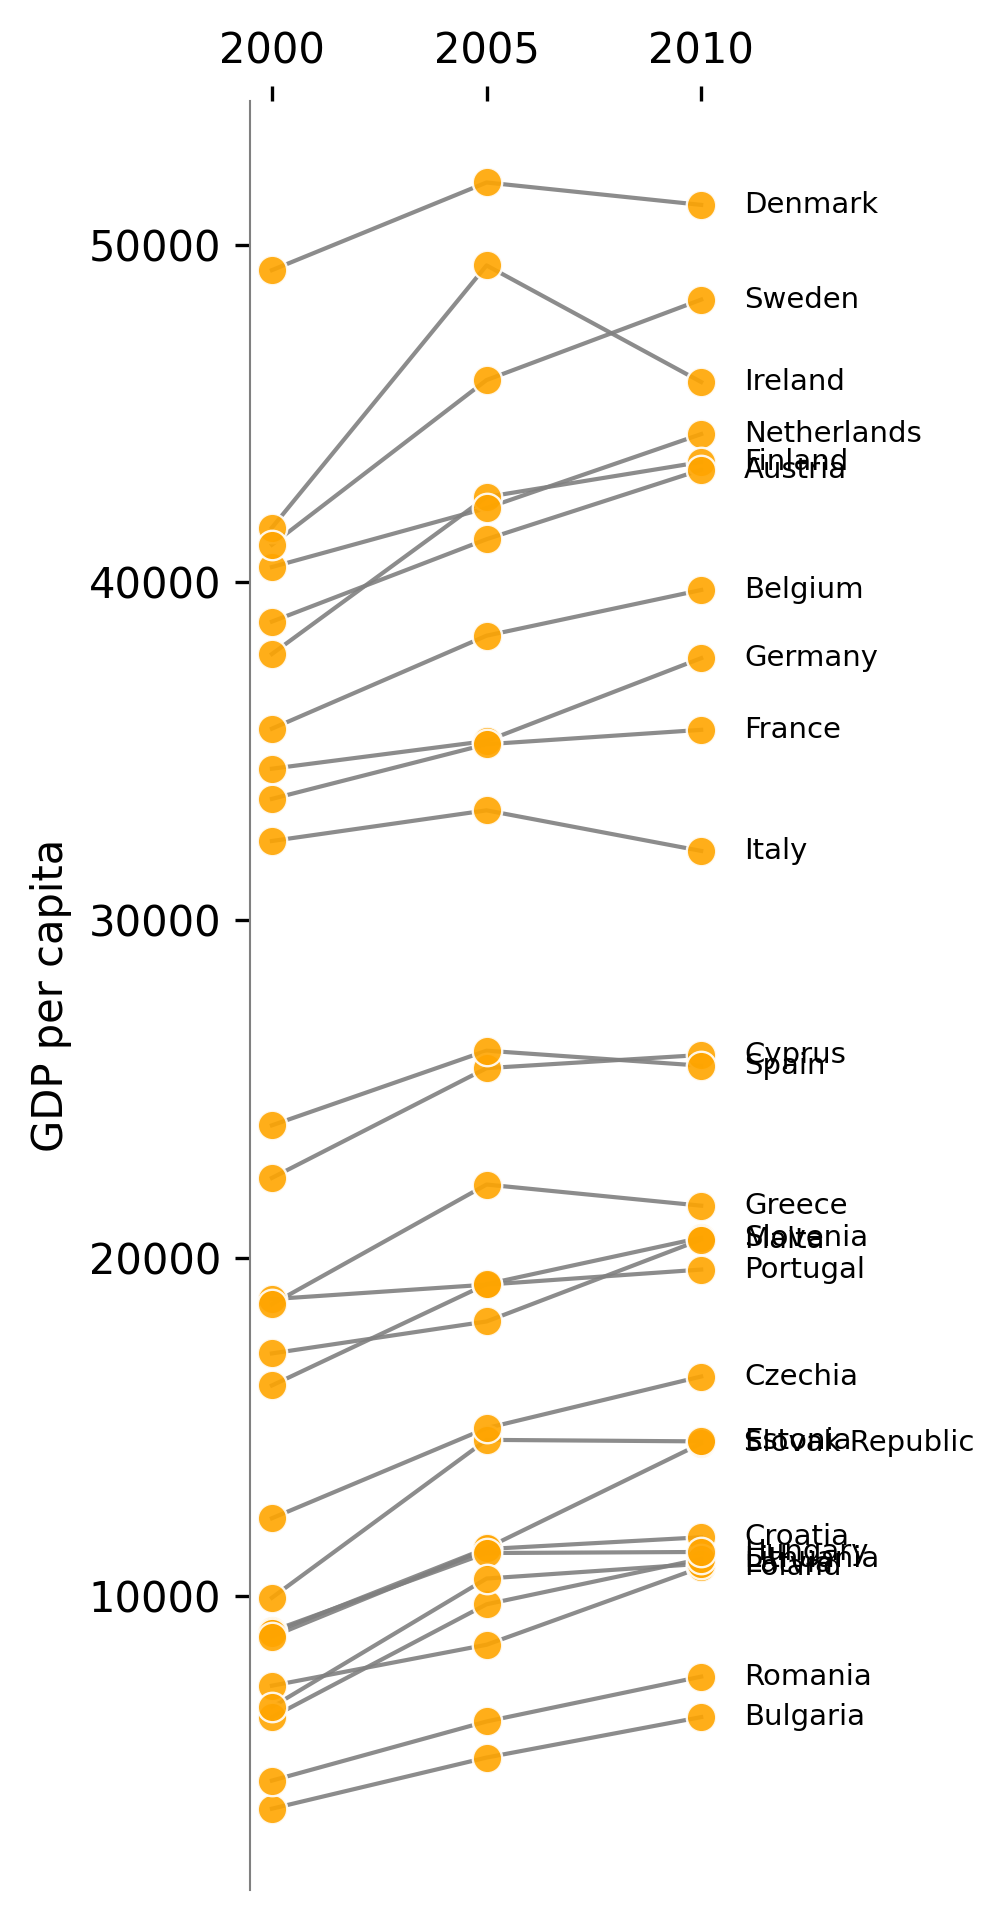

In [20]:
fig = plt.figure(figsize=(3.5, 6.5))

# Plot lines connecting points for each country
sns.lineplot(europe_GDP,
            x='Year',
            y='GDP_per_capita',
            units='Country',
            estimator=None,
            color='grey',
            alpha=0.9,
            linewidth=1,
            zorder=1)

# Add scatter points
sns.scatterplot(europe_GDP,
                x='Year',
                y='GDP_per_capita',
                color='orange',
                s=50,
                edgecolor='white',
                alpha=0.9,
                zorder=2)

## Add labels for 2015
# Add labels with conditional color
for _, row in europe_GDP[europe_GDP['Year'] == 2010].iterrows():
   color = 'black'
   plt.annotate(row['Country'],
               xy=(row['Year'], row['GDP_per_capita']),
               xytext=(row['Year']+1, row['GDP_per_capita']),
               va='center', size=7, color=color)

plt.gca().spines[['top','right','bottom']].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['left'].set_linewidth(0.5)

plt.xticks([2000, 2005, 2010])
plt.xlabel('')
plt.ylabel('GDP per capita')

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')

plt.tight_layout()
plt.show()



---



## <font color="#B0AD89"><strong>4.2 ⫶ </strong></font>Multiple x-y relationships
<img src="https://i.imgur.com/5YUe2WA.png" width=1024 />


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Scatter matrix

<img src="https://i.imgur.com/exQOoeB.png" width=1024 />

<img src="https://i.imgur.com/UUw3iQH.png" width=1024 />

In [ ]:
plt.figure(figsize=(6, 6))
selected_data = life_exp_adult_mort[['Life_expectancy', 'Adult_mortality',
                                     'Under_five_deaths', 'Infant_deaths',
                                     'Economy_status']]

sns.pairplot(selected_data,
            hue='Economy_status',
            plot_kws=dict(alpha=0.8, linewidth=1),
            corner=True)

plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Correlograms

<img src="https://i.imgur.com/eqYkzAW.png" width=1024 />

<img src="https://i.imgur.com/HsuTdGc.png" width=1024 />








In [ ]:
# Calculate correlation matrix
cols = ["Life_expectancy", "Adult_mortality", "Under_five_deaths", "Infant_deaths",
       "GDP_per_capita", "BMI", "Population_mln"]
cor_matrix = life_exp_adult_mort[cols].corr()

# Create a dictionary to map old column names to new labels
new_labels = {
    "Life_expectancy": "Life\nExp.",
    "Adult_mortality": "Adult\nMort.",
    "Under_five_deaths": "Under 5\nDeaths",
    "Infant_deaths": "Infant\nDeaths",
    "GDP_per_capita": "GDP",
    "BMI": "BMI",
    "Population_mln": "Pop.\n(mln)"
}

# Rename the columns in the correlation matrix for plotting
cor_matrix = cor_matrix.rename(columns=new_labels, index=new_labels)

print(np.round(cor_matrix, 2))

<img src="https://i.imgur.com/kU6vYDY.png" width=1024 />








In [ ]:
# Create heatmap with modified labels
plt.figure(figsize=(6, 6))

ax = sns.heatmap(cor_matrix,
                 mask=np.triu(np.ones_like(cor_matrix)),
                 cmap='PiYG',
                 annot=True,
                 fmt='.2f',
                 center=0,
                 linewidth=.5,
                 square=True,
                 cbar_kws={"orientation": "horizontal",
                           "pad": 0.1,
                           "shrink": 0.75})  # Adjust colorbar size if needed

# Remove the top-most y-axis label and the right-most x-axis label
ax.set_yticklabels([""] + list(cor_matrix.index)[1:], minor=False)  # Remove first y-axis label
ax.set_xticklabels(list(cor_matrix.columns)[:-1] + [""], minor=False)  # Remove last x-axis label
ax.tick_params(axis='both', length=0)

# Rotate the tick labels, set the limits
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>c ⬝ </strong></font>Principal Component Analysis

<img src="https://i.imgur.com/uKrTUXb.png" width=1024 />








<img src="https://i.imgur.com/bJTUNmH.png" width=1024 />

<img src="https://i.imgur.com/uMQ18Cv.png" width=1024 />













In [ ]:
life_exp_adult_mort.columns

In [ ]:
# Compute PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Prepare data
X = life_exp_adult_mort[['Life_expectancy', 'Adult_mortality','Alcohol_consumption', 'Infant_deaths', 'Schooling', 'BMI']].reset_index(drop=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Create PCA scores dataframe
pca_scores = pd.DataFrame(np.round(pca_result, 3),
                        columns=[f'PC{i+1}' for i in range(X.shape[1])])
pca_scores['Economy_status'] = life_exp_adult_mort['Economy_status'].copy()
pca_scores['Country'] = life_exp_adult_mort['Country'].copy()
pca_scores['Region'] = life_exp_adult_mort['Region'].copy()

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

print(pca_scores)
print('\nExplained variance ratios:')
np.round(explained_variance_ratio, 3)

In [ ]:
# Get loadings (components)
loadings = pd.DataFrame(
   pca.components_.T[:, :2],
   columns=['PC1', 'PC2'],
   index=X.columns
).reset_index()
loadings.columns = ['Variable', 'PC1', 'PC2']

loadings

<img src="https://i.imgur.com/5Hkp0MO.png" width=1024 />













In [ ]:
plt.figure(figsize=(6, 5))

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1'], row['PC2'],
             head_width=0.02,
             head_length=0.02,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1'], row['PC2']+0.02, row['Variable'],
            ha='center', va='bottom', size=10)

plt.xlim(-0.75, 0.75)
plt.ylim(-0.25, 0.85)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()


<img src="https://i.imgur.com/Pf4rm8W.png" width=1024 />













In [ ]:
plt.figure(figsize=(6, 5))

# Create scatterplot using seaborn
sns.scatterplot(
    data=pca_scores,
    x='PC1',
    y='PC2',
    hue='Economy_status',  # Color points by 'Economy_status'
    s=50,
    edgecolor='white',
    linewidth=1,
    alpha=0.4
)

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1']*5, row['PC2']*5,
             head_width=0.1,
             fc='slateblue',
             ec='slateblue')
   plt.text(row['PC1']*5, row['PC2']*5+0.1, row['Variable'],
            ha='center', va='bottom', size=10)


plt.xlim(-3.5, 3.75)
plt.ylim(-2, 4)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/yRNBXwO.png" width=1024 />













In [ ]:
plt.figure(figsize=(4.75, 3.5))

region_colors = {
   'Europe': 'royalblue',
   'Asia': 'goldenrod',
   'Africa': 'gray',
   'Americas': 'firebrick',
   'Oceania': 'forestgreen'
}

plt.figure(figsize=(6, 5))

# Create scatterplot using seaborn
sns.scatterplot(
    data=pca_scores,
    x='PC1',
    y='PC2',
    hue='Region',  # Color points by 'Region'
    palette=region_colors,
    s=50,
    edgecolor='white',
    linewidth=1,
    zorder=2
)

# Plot arrows and labels
for idx, row in loadings.iterrows():
   plt.arrow(0, 0, row['PC1']*5, row['PC2']*5,
             head_width=0.1,
             fc='slateblue',
             ec='slateblue',
             zorder=3)
   plt.text(row['PC1']*5, row['PC2']*5+0.1, row['Variable'],
            ha='center', va='bottom', size=10)


plt.xlim(-3.5, 3.75)
plt.ylim(-2, 4.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
**Issue: How does illness-related variables relate to each other?**

Make a correlograms to see how illness-related variables relate to each other. Also, make a PCA 1 and PCA 2 scatterplot, colored by `Economy_status`.


In [ ]:
# Define illness variables
illness_variables = ['Hepatitis_B', 'Measles',
                    'Polio', 'Diphtheria', 'Incidents_HIV', 'BMI',
                    'Thinness_ten_nineteen_years', 'Thinness_five_nine_years']

# Create illness_data DataFrame
illness_data = life_expectancy[
    life_expectancy['Year'] == 2000
].reset_index(drop=True).copy()  # Create a copy to avoid SettingWithCopyWarning

# Create Economy_status column based on Economy_status_Developed
illness_data['Economy_status'] = illness_data['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

# Select required columns
illness_data = illness_data[['Country', 'Economy_status'] + illness_variables]

# Print the DataFrame
illness_data

In [ ]:
# Calculate correlation matrix
illness_cor_matrix = illness_data[illness_variables].corr()

# Print rounded correlation matrix
round(illness_cor_matrix, 2)

Correlogram:

PCA Plot

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data for PCA (excluding non-numeric columns)
pca_data = illness_data.drop(['Country', 'Economy_status'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Compute PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame with PCA scores
pca_scores = pd.DataFrame(
    np.round(pca_result, 3),
    columns=[f'PC{i+1}' for i in range(len(illness_variables))]
)

# Add Economy_status and Country back to the DataFrame
pca_scores['Economy_status'] = illness_data['Economy_status']
pca_scores['Country'] = illness_data['Country']

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print results
print("\nFirst 12 rows of PCA scores:")
print(pca_scores.head(12))
print("\nProportion of variance explained:")
print(pd.Series(explained_variance_ratio, index=[f'PC{i+1}' for i in range(len(illness_variables))]))

In [ ]:
# Extract loadings (components) from PCA
loadings = pca.components_.T  # Transpose to match R's format

# Create DataFrame with loadings for first two components
loadings_df = pd.DataFrame(
    loadings[:, :2],  # Select first two columns
    columns=['PC1', 'PC2'],  # Name the columns
    index=illness_variables  # Use original variable names as index
)

# Reset index to make variable names a column
loadings_df = loadings_df.reset_index().rename(columns={'index': 'Variable'})

# Print the loadings
print("\nPCA Loadings (first two components):")
print(loadings_df)

In [ ]:
# Create a loading matrix plot



In [ ]:
# Create a PC1 vs PC2 scatterplot, colored by Economy Status





---



## <font color="#B0AD89"><strong>4.3 ⫶ </strong></font>Time series

<img src="https://i.imgur.com/cfqJcNG.png" width=1024 />

### <font color="#B0AD89"><strong>a ⬝ </strong></font>Individual time series

<img src="https://i.imgur.com/Z77TqCg.png" width=1024 />



In [ ]:
rwanda_life_expectancy = life_expectancy[
   life_expectancy['Country'] == 'Rwanda'
][['Year', 'Life_expectancy']].sort_values('Year')

# Convert 'Year' to an ordered categorical variable
rwanda_life_expectancy['Year'] = pd.Categorical(rwanda_life_expectancy['Year'], ordered=True)

print(rwanda_life_expectancy)

<img src="https://i.imgur.com/rG2X5TS.png" width=1024 />

In [ ]:
plt.figure(figsize=(5, 4))

sns.scatterplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                edgecolor='white',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/fLUonCE.png" width=1024 />

<img src="https://i.imgur.com/RaFDtww.png" width=1024 />

In [ ]:
plt.figure(figsize=(5, 4))

sns.lineplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                linewidth=1.5,
                zorder=2)

sns.scatterplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                edgecolor='white',
                linewidth=1.5,
                zorder=3)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/4TWMSmN.png" width=1024 />

In [ ]:
plt.figure(figsize=(5, 4))

sns.lineplot(rwanda_life_expectancy,
                x='Year',
                y='Life_expectancy',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/8JZOWEE.png" width=1024 />

In [ ]:
plt.figure(figsize=(5, 4))

# Using fill_between with the same data
sns.lineplot(rwanda_life_expectancy,
           x='Year',
           y='Life_expectancy',
           linewidth=1.5,
           zorder=3,
           color='steelblue')

plt.fill_between(rwanda_life_expectancy['Year'],
                rwanda_life_expectancy['Life_expectancy'],
                alpha=0.4,
                color='steelblue',
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid (behind the fill)
plt.grid(color='lightgrey', alpha=0.5, linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

### <font color="#B0AD89"><strong>b ⬝ </strong></font>Multiple time series

<img src="https://i.imgur.com/7kjmLRO.png" width=1024 />

In [ ]:
country_colors = {
   'Rwanda': 'forestgreen',
   'Somalia': 'dodgerblue',
   'Tanzania': 'gray'
}

africa_life_expectancy = life_expectancy[
   life_expectancy['Country'].isin(['Rwanda', 'Somalia', 'Tanzania'])
][['Country', 'Year', 'Life_expectancy']].sort_values('Year')

print(africa_life_expectancy)

<img src="https://i.imgur.com/IoxNFaL.png" width=1024 />

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(africa_life_expectancy,
                x='Year',
                y='Life_expectancy',
                hue='Country',
                palette=country_colors,
                edgecolor='white',
                linewidth=1.5,
                zorder=2)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=0)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/BjIG6GG.png" width=1024 />

In [ ]:
plt.figure(figsize=(6, 4))

sns.scatterplot(africa_life_expectancy,
                x='Year',
                y='Life_expectancy',
                hue='Country',
                palette=country_colors,
                edgecolor='white',
                linewidth=1.5,
                zorder=3)

sns.lineplot(africa_life_expectancy,
             x='Year',
             y='Life_expectancy',
             hue='Country',
             palette=country_colors,
             linewidth=1.5,
             zorder=2,
             legend=False)

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/XLOsKRG.png" width=1024 />

In [ ]:
plt.figure(figsize=(6, 4))

sns.lineplot(africa_life_expectancy,
             x='Year',
             y='Life_expectancy',
             hue='Country',
             palette=country_colors,
             linewidth=1.5,
             zorder=2,
             legend=False)

# Add country labels at the end of each line
for country in africa_life_expectancy['Country'].unique():
   country_data = africa_life_expectancy[africa_life_expectancy['Country'] == country]
   last_point = country_data.iloc[-1]
   plt.annotate(country,
               xy=(last_point['Year'], last_point['Life_expectancy']),
               xytext=(5, 0),
               textcoords='offset points',
               va='center',
               color=country_colors[country])

plt.xlabel('')
plt.ylabel('Life Expectancy')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.tight_layout()
plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
**Issue: How was the temperature change in June-August 2015 for Tokyo and Sydney?**

Make a scatterplot joined by lines to see the change of temperature in Tokyo and Sydney for June-August 2015.

In [ ]:
import datetime

# Create color dictionary
city_color = {'Tokyo': '#FF6961', 'Sydney': '#4682B4' }

# Filter and prepare temperature data
tokyo_sydney_temp = city_temperature[
    (city_temperature['City'].isin(['Tokyo', 'Sydney'])) &
    (city_temperature['Year'] == 2015) &
    (city_temperature['Month'].isin([6, 7, 8]))
].copy()

# Create Date column
tokyo_sydney_temp['Date'] = pd.to_datetime(
    tokyo_sydney_temp[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

# Select required columns
tokyo_sydney_temp = tokyo_sydney_temp[['Date', 'City', 'AvgTemperature']]

# Print the result
print(tokyo_sydney_temp)



---



# **Lesson** <font color="#B0AD89"><strong>4B ⫶⫶ </strong></font>Visualizing Trends

<img src="https://i.imgur.com/POG7Rpo.png" width=1024 />


## <font color="#B0AD89"><strong>4.4 ⫶ </strong></font>Smoothing

<img src="https://i.imgur.com/e2pZkjj.png" width=1024 />



### <font color="#B0AD89"><strong>a ⬝ </strong></font>Moving averages

<img src="https://i.imgur.com/zBpHkys.png" width=1024 />




In [ ]:
tokyo_temperature = city_temperature[
   (city_temperature['City'] == 'Tokyo') &
   (city_temperature['Year'] == 2010)
].copy()

tokyo_temperature['Date'] = pd.to_datetime(
   tokyo_temperature[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

tokyo_temperature = tokyo_temperature[['Date', 'AvgTemperature']]

print(tokyo_temperature)

In [ ]:
tokyo_temp_avg = tokyo_temperature.sort_values('Date').copy()

# Calculate rolling averages
tokyo_temp_avg['Avg02'] = tokyo_temp_avg['AvgTemperature'].rolling(window=2).mean()
tokyo_temp_avg['Avg04'] = tokyo_temp_avg['AvgTemperature'].rolling(window=4).mean()
tokyo_temp_avg['Avg06'] = tokyo_temp_avg['AvgTemperature'].rolling(window=6).mean()
tokyo_temp_avg['Avg10'] = tokyo_temp_avg['AvgTemperature'].rolling(window=10).mean()
tokyo_temp_avg['Avg20'] = tokyo_temp_avg['AvgTemperature'].rolling(window=20).mean()
tokyo_temp_avg['Avg50'] = tokyo_temp_avg['AvgTemperature'].rolling(window=50).mean()

print(tokyo_temp_avg)

In [ ]:
tokyo_temperature_long = tokyo_temp_avg[['Date', 'AvgTemperature', 'Avg10', 'Avg20', 'Avg50']].melt(
   id_vars=['Date'],
   value_vars=['AvgTemperature', 'Avg10', 'Avg20', 'Avg50'],
   var_name='Type',
   value_name='Temperature'
).sort_values('Type', ascending=False)

print(tokyo_temperature_long)

<img src="https://i.imgur.com/2zs91Z7.png" width=1024 />




In [ ]:
line_colors = {
   'AvgTemperature': 'lightgray',
   'Avg10': 'dodgerblue',
   'Avg20': 'indianred',
   'Avg50': 'forestgreen'
}

plt.figure(figsize=(7, 3))

# Plot moving averages
sns.lineplot(data=tokyo_temperature_long,
            x='Date',
            y='Temperature',
            hue='Type',
            palette=line_colors,
            linewidth=1,
            zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

<img src="https://i.imgur.com/lPIVwdU.png" width=1024 />




### <font color="#B0AD89"><strong>b ⬝ </strong></font>LOESS

<img src="https://i.imgur.com/iaNTbfW.png" width=1024 />




In [ ]:
# Create date numeric and calculate rolling average
tokyo_temp_avg_loess = tokyo_temperature.copy()
tokyo_temp_avg_loess['DateNumeric'] = (tokyo_temp_avg_loess['Date'] - pd.Timestamp("1970-01-01")).dt.total_seconds()
tokyo_temp_avg_loess['Avg100'] = tokyo_temp_avg_loess['AvgTemperature'].rolling(window=100).mean()

# Add LOESS smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
loess = lowess(tokyo_temp_avg_loess['AvgTemperature'],
              tokyo_temp_avg_loess['DateNumeric'],
              frac=0.3,
              return_sorted=False)
tokyo_temp_avg_loess['LOESS'] = loess

# Convert to long format
tokyo_temp_long = tokyo_temp_avg_loess.melt(
   id_vars=['Date'],
   value_vars=['AvgTemperature', 'Avg100', 'LOESS'],
   var_name='AverageType',
   value_name='Temperature'
)

print(tokyo_temp_avg_loess)
tokyo_temp_long

<img src="https://i.imgur.com/W1d1EcW.png" width=1024 />




In [ ]:
plt.figure(figsize=(7, 3))

colors = {'AvgTemperature': 'lightgray', 'Avg100': 'red', 'LOESS': 'blue'}

sns.lineplot(data=tokyo_temp_long,
             x='Date',
             y='Temperature',
             hue='AverageType',
             palette=colors,
             linewidth=1,
             zorder=2)

plt.xlabel('')
plt.ylabel('Temperature')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.show()

<img src="https://i.imgur.com/LGvTvRQ.png" width=1024 />




In [ ]:
plt.figure(figsize=(3.5, 3.5))

# Add LOESS smoothing
sns.regplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='Adult_mortality',
           scatter=True,
           lowess=True,
           line_kws={'linewidth': 2, 'zorder':3},
           scatter_kws={'alpha': 0.3, 'edgecolor':'white','s':20, 'zorder':2}
           )

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#B0AD89"><strong>  Practice ᆢ</strong></font>ᆢᆢ
**Issue: How was the temperature change in 2015 for Tokyo and Sydney?**

Try moving average and LOESS smoothing methods to see the change of temperature in Tokyo and Sydney for  2015. Draw both the scatterplot and the smoothing line.

In [ ]:
# Create color dictionary
city_color = {'Tokyo': '#FF6961','Sydney': '#4682B4'}

# Filter and prepare temperature data
tokyo_sydney_temp = city_temperature[
    (city_temperature['City'].isin(['Tokyo', 'Sydney'])) &
    (city_temperature['Year'] == 2015) &
    (city_temperature['AvgTemperature'] != -99)  # Filter out -99 values
].copy()

# Create Date column
tokyo_sydney_temp['Date'] = pd.to_datetime(
    tokyo_sydney_temp[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)

# Select required columns
tokyo_sydney_temp = tokyo_sydney_temp[['Date', 'City', 'AvgTemperature']]

# Print the result
tokyo_sydney_temp

Moving Average Plot

LOESS plot:



---



## <font color="#B0AD89"><strong>4.5 ⫶ </strong></font>Curve Fitting


### <font color="#B0AD89"><strong>a ⬝ </strong></font>Showing trends with a defined functional form

<img src="https://i.imgur.com/njOwimr.png" width=1024 />




In [ ]:
life_exp_adult_mort = life_expectancy[
   life_expectancy['Year'] == 2010
][['Country', 'Life_expectancy', 'Adult_mortality', 'GDP_per_capita']].copy()

life_exp_adult_mort['Economy_status'] = life_expectancy[
   life_expectancy['Year'] == 2010
]['Economy_status_Developed'].map({1: 'Developed', 0: 'Developing'})

life_exp_adult_mort

<img src="https://i.imgur.com/jZy8che.png" width=1024 />

In [ ]:
# Fit linear regression
from sklearn.linear_model import LinearRegression
X = life_exp_adult_mort[['Life_expectancy']]
y = life_exp_adult_mort['Adult_mortality']
model = LinearRegression().fit(X, y)

f"Regression formula:\ny = {model.intercept_:.2f} + {model.coef_[0]:.2f}x\n"


In [ ]:
# Plot
plt.figure(figsize=(6, 5))

# Add regression line
sns.regplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='Adult_mortality',
           scatter=True,
           color='darkred',
           line_kws={'linewidth': 2, 'zorder': 3},
           scatter_kws={'alpha': 0.3, 'edgecolor':'white','s':20, 'zorder':2}
           )

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/Y4FzTna.png" width=1024 />




In [ ]:
# Exponential regression
from scipy.optimize import curve_fit

def exp_func(x, a, b):
   return a * np.exp(b * x)

popt, _ = curve_fit(exp_func,
                   life_exp_adult_mort['Life_expectancy'],
                   life_exp_adult_mort['GDP_per_capita'],
                   p0=[0.5, 0.1])

# Add predictions
life_exp_adult_mort['predicted_GDP'] = exp_func(life_exp_adult_mort['Life_expectancy'], *popt)

f"Exponential regression formula:\ny = {popt[0]:.4f} * exp({popt[1]:.4f}x)"


In [ ]:
# Plot
plt.figure(figsize=(6, 5))

# Add plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='GDP_per_capita',
           color='darkgoldenrod',
           alpha=0.2)

# Plot the curve
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y='predicted_GDP',
             color='darkgoldenrod',
             linewidth=2)

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/uE0lglQ.png" width=1024 />




In [ ]:
plt.figure(figsize=(6, 5))

# Add plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y='GDP_per_capita',
           color='darkgoldenrod',
           alpha=0.2)

# Plot the curve
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y='predicted_GDP',
             color='darkgoldenrod',
             linewidth=2)

# Set log scale for y-axis
plt.yscale('log')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/HCsGggf.png" width=1024 />




In [ ]:
plt.figure(figsize=(6, 5))

sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y=np.log(life_exp_adult_mort['GDP_per_capita']),
           color='darkgoldenrod',
           alpha=0.2)

sns.regplot(data=life_exp_adult_mort,
            x='Life_expectancy',
            y=np.log(life_exp_adult_mort['GDP_per_capita']),
            scatter=False,
            line_kws={'linewidth': 1.5})

plt.ylabel('log(GDP_per_capita)')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

<img src="https://i.imgur.com/r45DeNb.png" width=1024 />




In [ ]:
plt.figure(figsize=(6, 5))

# Scatter plot
sns.scatterplot(data=life_exp_adult_mort,
           x='Life_expectancy',
           y=np.log(life_exp_adult_mort['GDP_per_capita']),
           color='darkgoldenrod',
           alpha=0.2)

# Linear regression line
sns.regplot(data=life_exp_adult_mort,
            x='Life_expectancy',
            y=np.log(life_exp_adult_mort['GDP_per_capita']),
            scatter=False,

            line_kws={'linewidth': 1.5})

# Exponential regression line
sns.lineplot(data=life_exp_adult_mort,
             x='Life_expectancy',
             y=np.log(life_exp_adult_mort['predicted_GDP']),
             color='darkgoldenrod',
             linewidth=2)

plt.ylabel('log(GDP_per_capita)')

# Add grid with zorder=1
plt.grid(color='lightgrey', linestyle='-', zorder=1)

# Remove the box and ticks
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().tick_params(length=0)

plt.show()

## <font color="#009BF3"><strong>  Practice ᆢ</strong></font>ᆢᆢ
**Issue: In Developing countries, can we formulate child thinness using BMI?**

Try to formulate a linear regression for `Thinness_five_nine_years` vs `BMI` then plot the scatterplot and the regression line.

In [ ]:
# Filter and select data for developing countries in 2010
thinness_BMI_data = life_expectancy[
    (life_expectancy['Year'] == 2010) &
    (life_expectancy['Economy_status_Developing'] == 1)
][['Country', 'Thinness_five_nine_years', 'BMI', 'Population_mln']]

# Print the result
thinness_BMI_data

Visualization:

---
---
---